In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import datetime as dt

WEBSITE TO DOWNLOAD PRICE DATA: https://www.fxstreet.com/economic-calendar

WEBSITE TO DOWNLOAD NEWS DATA https://www.fxstreet.com/economic-calendar

In [ ]:
upload = files.upload()

Saving EURUSD15.csv to EURUSD15.csv


In [ ]:
# FILE EUR
with open("EURUSD15.csv", "r") as f:
    content = f.read()

# Hot to manage space and tab
import re
content = re.sub(r"[\t ]+", ",", content)

with open("EURUSD15_clean.csv", "w") as f:
    f.write(content)

eur = pd.read_csv("EURUSD15_clean.csv")
columns = ["Date","Time","Open","High","Low","Close","Volume"]
eur.columns= columns
eur.drop(columns="Volume",inplace=True)
eur.head()

,Date,Time,Open,High,Low,Close
0,2021-09-14,19:15,1.18056,1.18068,1.18021,1.18024
1,2021-09-14,19:30,1.18025,1.18031,1.18000,1.18027
2,2021-09-14,19:45,1.18028,1.18072,1.18028,1.18046
3,2021-09-14,20:00,1.18049,1.18067,1.18043,1.18059
4,2021-09-14,20:15,1.18060,1.18072,1.18059,1.18070


In [ ]:
upload = files.upload()

Saving USDJPY15.csv to USDJPY15.csv


In [ ]:
# FILE USDJPY
with open("USDJPY15.csv", "r") as f:
    content = f.read()

import re
content = re.sub(r"[\t ]+", ",", content)

with open("USDJPY15_clean.csv", "w") as f:
    f.write(content)

jpy = pd.read_csv("USDJPY15_clean.csv")
columns = ["Date","Time","Open","High","Low","Close","Volume"]
jpy.columns= columns
jpy.drop(columns="Volume",inplace=True)
jpy.head()

,Date,Time,Open,High,Low,Close
0,2021-09-16,06:45,109.308,109.362,109.294,109.355
1,2021-09-16,07:00,109.354,109.373,109.323,109.371
2,2021-09-16,07:15,109.371,109.374,109.332,109.352
3,2021-09-16,07:30,109.353,109.353,109.271,109.321
4,2021-09-16,07:45,109.320,109.365,109.308,109.354


In [ ]:
upload = files.upload()

Saving XAUUSD15.csv to XAUUSD15.csv


In [ ]:
# FILE XAU
with open("XAUUSD15.csv", "r") as f:
    content = f.read()

import re
content = re.sub(r"[\t ]+", ",", content)

with open("XAUUSD_clean.csv", "w") as f:
    f.write(content)

xau = pd.read_csv("XAUUSD_clean.csv")
columns = ["Date","Time","Open","High","Low","Close","Volume"]
xau.columns= columns
xau.drop(columns="Volume",inplace=True)
xau.head()

,Date,Time,Open,High,Low,Close
0,2021-06-28,14:45,1779.518,1780.538,1776.908,1777.748
1,2021-06-28,15:00,1777.708,1782.368,1777.708,1781.308
2,2021-06-28,15:15,1781.308,1781.915,1778.978,1779.285
3,2021-06-28,15:30,1779.265,1779.978,1778.818,1779.548
4,2021-06-28,15:45,1779.548,1780.858,1778.378,1780.768


In [ ]:
upload = files.upload()

Saving Economic-calendar from 2020-2025_09_05.csv to Economic-calendar from 2020-2025_09_05.csv


In [ ]:
# FILE NEWS
news = pd.read_csv("Economic-calendar from 2020-2025_09_05.csv")
news["Start"] = pd.to_datetime(news["Start"], format="%m/%d/%Y %H:%M:%S")

news["Date"] = news["Start"].dt.date
news["Time"] = news["Start"].dt.time
news["Date"] = pd.to_datetime(news["Date"])

news.drop(columns=["Id","Start"], inplace=True)

news.head()

,Name,Impact,Currency,Date,Time
0,ISM Manufacturing PMI,HIGH,USD,2020-01-03,15:00:00
1,FOMC Minutes,HIGH,USD,2020-01-03,19:00:00
2,Core Harmonized Index of Consumer Prices (YoY),HIGH,EUR,2020-01-07,10:00:00
3,Harmonized Index of Consumer Prices (YoY),HIGH,EUR,2020-01-07,10:00:00
4,ISM Services PMI,HIGH,USD,2020-01-07,15:00:00


In [ ]:
# MANAGE NEWS FILE
#pd.reset_option("display.max_rows")
#pd.set_option("display.max_rows", None)
# delete the news that i can trade for the night hour
news["Time"] = pd.to_datetime(news["Time"], format="%H:%M:%S").dt.time

# define time limit
t_start = dt.time(19, 30)   # 21:30 UTC+2
t_end   = dt.time(5, 30)    # 07:30

# use only news in that range
mask = ~((news["Time"] >= t_start) | (news["Time"] <= t_end))
news = news[mask]
news.head()

# rename news: there are news with the same nomne but depends by different currency
news["Unique_Name"] = news["Currency"] + " " + news["Name"]
news_unique = news["Unique_Name"].value_counts()

# if there isn't more than 10 equal news delete it
n = 10
counts = news["Unique_Name"].value_counts()

# Filter
news = news[news["Unique_Name"].isin(counts[counts >= n].index)]

print(news[["Unique_Name","Currency"]].value_counts())


Unique_Name                               Currency
EUR ECB's President Lagarde speech        EUR         253
GBP BoE's Governor Bailey speech          GBP         136
USD Fed's Chair Powell speech             USD          75
CAD Unemployment Rate                     CAD          69
EUR Gross Domestic Product s.a. (QoQ)     EUR          69
                                                     ... 
USD Initial Jobless Claims                USD          15
CHF SNB Press Conference                  CHF          14
USD President Trump speech                USD          14
USD President Biden speech                USD          12
USD Interest Rate Projections - 3rd year  USD          10
Name: count, Length: 93, dtype: int64


In [ ]:
# BUILD THE DF FOR BACKTEST

asset = eur.copy()

# date timne management
asset["Date"] = pd.to_datetime(asset["Date"])
news["Date"] = pd.to_datetime(news["Date"])
asset["DateTime"] = pd.to_datetime(asset["Date"].astype(str) + " " + asset["Time"])
news["DateTime"] = pd.to_datetime(news["Date"].astype(str) + " " + news["Time"].astype(str))

# merge asset df and news df
common_times = set(news["DateTime"]).intersection(set(asset["DateTime"]))

asset["Match"] = asset["DateTime"].isin(common_times).astype(int)

# initialization with Nan columns
asset["Name"] = None
asset["Currency"] = None

news_map = dict(zip(news["DateTime"], zip(news["Unique_Name"], news["Currency"])))

asset.loc[asset["Match"] == 1, ["Name", "Currency"]] = (
    asset.loc[asset["Match"] == 1, "DateTime"].map(news_map).tolist()
)

# insert 1 at the time when there is a news
Date = asset.loc[asset["Match"] == 1, "Date"].iloc[0]

asset.head()

,Date,Time,Open,High,Low,Close,DateTime,Match,Name,Currency
0,2021-09-14,19:15,1.18056,1.18068,1.18021,1.18024,2021-09-14 19:15:00,0,None,None
1,2021-09-14,19:30,1.18025,1.18031,1.18000,1.18027,2021-09-14 19:30:00,0,None,None
2,2021-09-14,19:45,1.18028,1.18072,1.18028,1.18046,2021-09-14 19:45:00,0,None,None
3,2021-09-14,20:00,1.18049,1.18067,1.18043,1.18059,2021-09-14 20:00:00,0,None,None
4,2021-09-14,20:15,1.18060,1.18072,1.18059,1.18070,2021-09-14 20:15:00,0,None,None


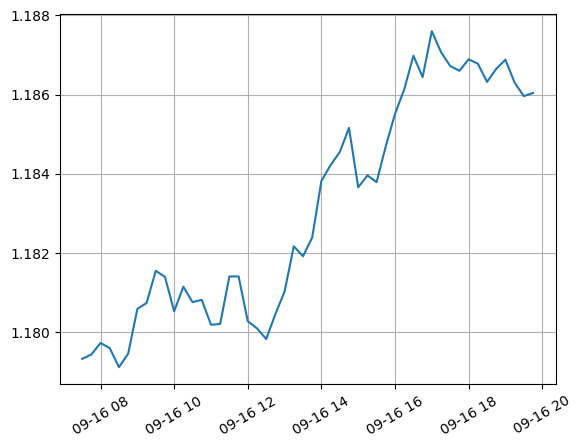

In [ ]:
# looking if the last day is correct respect the real price data
last_day= asset.iloc[99950:]
plt.plot(last_day["DateTime"],last_day["Close"])
plt.xticks(rotation=30)
plt.grid()
plt.show()

In [ ]:
# separete data in different test and validation to look the walkforward testing
Date1 = "2024-01-01"
Date2 = "2024-07-01"
Date3 = "2025-01-01"
Date4 = "2021-07-01"
Date5 = "2022-01-01"
Date6 = "2025-07-01"

asset_test1 = asset[asset["Date"] < Date1]
asset_test2 = asset[(asset["Date"] >= Date4) & (asset["Date"] < Date2)]
asset_test3 = asset[(asset["Date"] >= Date5) & (asset["Date"] < Date3)]

asset_val1 = asset[(asset["Date"] >= Date1) & (asset["Date"] < Date2)]
asset_val2 = asset[(asset["Date"] >= Date2) & (asset["Date"] < Date3)]
asset_val3 = asset[(asset["Date"] >= Date3)& (asset["Date"] < Date6)]

In [ ]:
# divide data in test and validation
Date1 = "2024-01-01"
Date6 = "2025-07-01"

test_asset = asset[asset["Date"] < Date1]
validation_asset = asset[(asset["Date"] >= Date1)& (asset["Date"] < Date6)]

In [ ]:
# use validation data filtered by news and currency
fix_asset_val = validation_asset.copy()
fix_asset_val = fix_asset_val[~fix_asset_val["Name"].isin(names_to_drop)]
fix_asset_val = fix_asset_val[~fix_asset_val["Currency"].isin(currency_to_drop)]

In [ ]:
# TRADING STRATEGY
n = 10  # numeber of candle to consider after the newsw occur

rr = 2  # risk-reward ratio

more_stop = 0.05 # take more stop to consider a possible spread

trades = []

test_df = asset.copy()

# iteration to the columns where there is the 0/1 based on news
for i in range(len(test_df.index) - n):
    if test_df["Match"].iloc[i] == 1:

        # save all variables you need
        name = test_df.iloc[i]["Name"]
        currency = test_df.iloc[i]["Currency"]
        news_low = test_df.iloc[i]["Low"]
        news_high = test_df.iloc[i]["High"]
        datetime = test_df.iloc[i]["DateTime"]
        after_news = test_df.iloc[i+1:i+n+1]

        entry_long = None
        entry_short = None

        for j in range(len(after_news)):
            current_candle = after_news.iloc[j]
            current_close = current_candle["Close"]
            current_high = current_candle["High"]
            current_low = current_candle["Low"]

            # take the minimum low in the range from news and entry
            stop_long = min(news_low, current_low)

            # take the mazimum high in the range from news and entry
            stop_short = max(news_high, current_high)

            # LONG
            if current_close > news_high and entry_long is None and current_close > news_low:

                entry_long = current_close

                stop_loss = stop_long - (current_close - stop_long) * more_stop
                take_profit = entry_long + rr * (entry_long - stop_loss)

                future_data = test_df.iloc[i+j+2:]

                outcome = "NONE"
                candles_to_outcome = None

                # Stop lose or targhet
                for k, (index, future_row) in enumerate(future_data.iterrows(), start=1):
                    if future_row["High"] >= take_profit:
                        outcome = rr
                        candles_to_outcome = k
                        break
                    elif future_row["Low"] <= stop_loss:
                        outcome = -1
                        candles_to_outcome = k
                        break

                trades.append({
                    "DateTime": datetime,
                    "Name": name,
                    "Currency": currency,
                    "direction": "LONG",
                    "entry": entry_long,
                    "stop_loss": stop_loss,
                    "take_profit": take_profit,
                    "candle_after": j+1,
                    "outcome": outcome,
                    "candles_to_outcome": candles_to_outcome
                })

            # SHORT
            if current_close < news_low and entry_short is None and current_close < news_high:

                entry_short = current_close

                stop_loss = stop_short + (stop_short - current_close) * more_stop
                take_profit = entry_short - rr * (stop_loss - entry_short)

                future_data = test_df.iloc[i+j+2:]

                outcome = "NONE"
                candles_to_outcome = None

                for k, (index, future_row) in enumerate(future_data.iterrows(), start=1):
                    if future_row["Low"] <= take_profit:
                        outcome = rr
                        candles_to_outcome = k
                        break
                    elif future_row["High"] >= stop_loss:
                        outcome = -1
                        candles_to_outcome = k
                        break

                trades.append({
                    "DateTime": datetime,
                    "Name": name,
                    "Currency": currency,
                    "direction": "SHORT",
                    "entry": entry_short,
                    "stop_loss": stop_loss,
                    "take_profit": take_profit,
                    "candle_after": j+1,
                    "outcome": outcome,
                    "candles_to_outcome": candles_to_outcome
                })

# DataFrame
trades_df = pd.DataFrame(trades)
trades_df.drop(columns = ["entry",  "stop_loss",  "take_profit" ],inplace=True)

# Debugging for non closed trades
non_num_index = trades_df[~trades_df["outcome"].apply(lambda x: True if pd.to_numeric(x, errors='coerce') is not None and not pd.isna(pd.to_numeric(x, errors='coerce')) else False)].index.tolist()
trades_df = trades_df.drop(non_num_index)

print(trades_df.head())


             DateTime                                     Name Currency direction  candle_after  outcome  candles_to_outcome
0 2021-09-15 06:00:00           GBP Consumer Price Index (YoY)      GBP      LONG             5       -1                  91
1 2021-09-15 12:30:00  CAD BoC Consumer Price Index Core (YoY)      CAD     SHORT             1        2                  81
2 2021-09-16 12:00:00       EUR ECB's President Lagarde speech      EUR     SHORT             2       -1                  26
3 2021-09-17 14:00:00    USD Michigan Consumer Sentiment Index      USD     SHORT             1        2                  68
4 2021-09-22 06:00:00                 JPY BoJ Press Conference      JPY      LONG             3        2                  45


In [ ]:
# Set  pandas to look all the columns
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

# function for parameters
def analyze_trades(trades_used,risk):
    df = trades_used.copy()

    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df = df.sort_values('DateTime')

    # 1. Cumulative PnL
    df['cumulative_pnl'] = df['outcome'].cumsum()

    plt.figure(figsize=(12, 6))
    plt.plot(df["DateTime"], df['cumulative_pnl'])
    #plt.plot(range(1,len(df)+1), df['cumulative_pnl'])
    plt.title('Cumulative PNL starting from '+str(df.iloc[0]["DateTime"]))
    #plt.xlabel('Data')
    plt.ylabel('Cumulative PNL')
    plt.xlabel('Number of trade')
    plt.grid(True)
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Win Rate and average rr
    df['win'] = df['outcome'] > 0
    win_rate = df['win'].mean()

    rr_medio = rr*win_rate + (-1)*(1-win_rate)

    # 3. max consecutive losses
    consecutive_losses = 0
    max_consecutive_losses = 0

    for outcome in df['outcome']:
        if outcome < 0:
            consecutive_losses += 1
            max_consecutive_losses = max(max_consecutive_losses, consecutive_losses)
        else:
            consecutive_losses = 0

    # 4. Max Drawdown
    df['equity_curve'] = df['outcome'].cumsum()
    rolling_max = df['equity_curve'].cummax()
    drawdown = rolling_max - df['equity_curve']
    max_drawdown = drawdown.max()

    # 5. DataFrame Long/Short
    long_trades = df[df['direction'] == 'LONG']
    short_trades = df[df['direction'] == 'SHORT']

    long_short_df = pd.DataFrame({
        'Direction': ['LONG', 'SHORT'],
        'WinRate': [long_trades['win'].mean(), short_trades['win'].mean()],
        'Cumulative_PnL': [long_trades['outcome'].sum(), short_trades['outcome'].sum()]
    })

    # 6. DataFrame type of News
    news_stats = df.groupby('Name').agg({
        'win': 'mean',
        'outcome': 'sum',
        'Name': 'count'
    }).rename(columns={'win': 'WinRate', 'outcome': 'Cumulative_PnL','Name': 'Num_Trades'}).reset_index()

    news_win = news_stats["WinRate"]
    news_stats["Expected_win"] = (rr*news_win + (-1)*(1-news_win))
    news_stats["Expected_win"] = news_stats["Expected_win"].map("{:.2f}".format)

    # 7. DataFrame for Currency
    currency_stats = df.groupby('Currency').agg({
        'win': 'mean',
        'outcome': 'sum',
        'Name': 'count'
    }).rename(columns={'win': 'WinRate', 'outcome': 'Cumulative_PnL','Name': 'Num_Trades'}).reset_index()
    curr_win = currency_stats["WinRate"]
    currency_stats["Expected_win"] = (rr*curr_win + (-1)*(1-curr_win))
    currency_stats["Expected_win"] = currency_stats["Expected_win"].map("{:.2f}".format)

    # 8. Standard deviation and sharpe ratio
    std = df['outcome'].std()
    mean = df['outcome'].mean()

    total_trades = len(df)
    years = (df['DateTime'].max() - df['DateTime'].min()).days / 365.25
    trades_per_year = total_trades / years
    annual_std = (std * (trades_per_year**0.5))*risk

    annual_mean = (mean * trades_per_year)*risk
    sharpe = (annual_mean / annual_std)

    # 10. candle time after news and after the entry
    candle_after_news = int(df["candle_after"].mean())
    candle_after_entry = int(df["candles_to_outcome"].mean())

    # Results
    print(f"\n=== ANALISYS ALL TRADES ===")
    print(f"Pnl : {df['cumulative_pnl'].iloc[-1]}")
    print(f"Numeber of Trade: {len(df["outcome"])}")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"Consecutive losses: {max_consecutive_losses}")
    print(f"Max Drawdown: {max_drawdown}")
    print(f"Annual volatility: {annual_std:.2%} considering a {risk:.2%} risk per trade of capital")
    print(f"CAGR: {annual_mean:.2%} considering a {risk:.2%} risk per trade  of capital")
    print(f"Sharpe ratio: {sharpe:.2}")
    print(f"Average Reward : {rr}")
    print(f"Exepcted value: {rr_medio:.2}")
    print(f"Average number of candles after news: {candle_after_news}")
    print(f"Average number of candles after entry: {candle_after_entry}")

    print(f"\n=== ANALISYS BY DIRECTION ===")
    print(long_short_df.to_string(index=False))

    print(f"\n=== ANALISYS BY NEWS ===")
    print(news_stats.to_string(index=False))

    print(f"\n=== ANALISYS BY CUURENCY ===")
    print(currency_stats.to_string(index=False))

    return {
        'win_rate': win_rate,
        'max_consecutive_losses': max_consecutive_losses,
        'max_drawdown': max_drawdown,
        'long_short_df': long_short_df,
        'news_stats': news_stats,
        'currency_stats': currency_stats,
        'cumulative_pml': df['cumulative_pnl']
    }

In [ ]:
# possible filter by currency
currency_filter = "USD"
trades_USD = trades_df[trades_df["Currency"] == currency_filter]

currency_filter = "EUR"
trades_EUR = trades_df[trades_df["Currency"] == currency_filter]

In [ ]:
# FILTER to consider only news with a positive expected value
fix_trades_df = trades_df.copy()
news_stats_df = results['news_stats']

# Convert EV in numerical value
news_stats_df["Expected_win"] = pd.to_numeric(news_stats_df["Expected_win"], errors="coerce")

# select only the news with a positive expected value
min_expected = 0.01
names_to_drop = news_stats_df.loc[news_stats_df["Expected_win"] <= min_expected, "Name"]

news_names = news_stats_df.loc[news_stats_df["Expected_win"] > min_expected, "Name"]

# Filtriamo fix_trades_df
fix_trades_df = fix_trades_df[~fix_trades_df["Name"].isin(names_to_drop)]

In [ ]:
# FILTER to consider only news with a positive pnl
fix_trades_df = trades_df.copy()
news_stats_df = results['news_stats']

news_stats_df["Cumulative_PnL"] = pd.to_numeric(news_stats_df["Cumulative_PnL"], errors="coerce")

min_pnl = 5
names_to_drop = news_stats_df.loc[news_stats_df["Cumulative_PnL"] <= min_pnl, "Name"]
news_names = news_stats_df.loc[news_stats_df["Cumulative_PnL"] > min_pnl, "Name"]

fix_trades_df = fix_trades_df[~fix_trades_df["Name"].isin(names_to_drop)]

In [ ]:
# FILTER to consider only currency with a positive expected value
news_stats_df = results['currency_stats']
news_stats_df["Expected_win"] = pd.to_numeric(news_stats_df["Expected_win"], errors="coerce")

min_expected = 0.01
currency_to_drop = news_stats_df.loc[news_stats_df["Expected_win"] <= min_expected, "Currency"]

fix_trades_df = fix_trades_df[~fix_trades_df["Currency"].isin(currency_to_drop)]

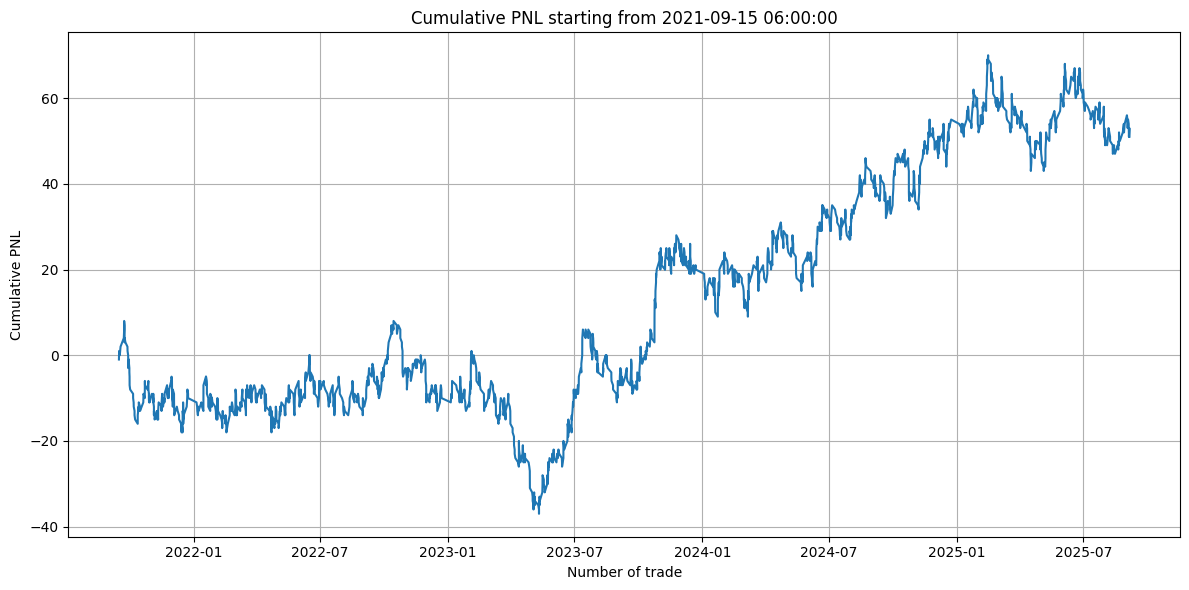


=== ANALISYS ALL TRADES ===
Pnl : 51
Numeber of Trade: 1887
Win Rate: 34.23%
Consecutive losses: 17
Max Drawdown: 45
Annual volatility: 15.52% considering a 0.50% risk per trade of capital
CAGR: 6.42% considering a 0.50% risk per trade  of capital
Sharpe ratio: 0.41
Average Reward : 2
Exepcted value: 0.027
Average number of candles after news: 3
Average number of candles after entry: 69

=== ANALISYS BY DIRECTION ===
Direction  WinRate  Cumulative_PnL
     LONG 0.342078              25
    SHORT 0.342612              26

=== ANALISYS BY NEWS ===
                                                          Name  WinRate  Cumulative_PnL  Num_Trades Expected_win
                       CAD BoC Consumer Price Index Core (YoY) 0.470588               7          17         0.41
                                CAD BoC Monetary Policy Report 0.333333               0           3        -0.00
                             CAD BoC Monetary Policy Statement 0.307692              -2          26        -

In [ ]:
# analyze metrics with function
risk_per_trade = 0.005
results = analyze_trades(trades_df,risk_per_trade)

In [ ]:
eur0124_0724 = trades_df.copy()

In [ ]:
eur0724_0125 = trades_df.copy()

In [ ]:
eur0125_0725 = trades_df.copy()

In [ ]:
# merge DataFrame
walk_forward = pd.concat([eur0124_0724,eur0724_0125,eur0125_0725], ignore_index=True)

# sort by "DateTime"
walk_forward = walk_forward.sort_values(by="DateTime").reset_index(drop=True)

In [ ]:
# hypothesis test
pnl = trades_df['outcome'].values
observed_mean = pnl.mean()
centered_pnl = pnl - pnl.mean()

n_simulations = 10000
simulated_means = []

for _ in range(n_simulations):
    # Resample with replacement
    sample = np.random.choice(centered_pnl, size=len(pnl), replace=True)
    simulated_means.append(sample.mean())

simulated_means = np.array(simulated_means)

p_value = (simulated_means >= observed_mean).mean()

print("Observed mean PnL:", observed_mean)
print("P-value:", p_value)

Observed mean PnL: 0.02702702702702703
P-value: 0.2106


In [ ]:
# save first backtest
trades_eur = trades_df.copy()

In [ ]:
# save second backtest
trades_xau= trades_df.copy()

In [ ]:
# merge DataFrame
final_strategy = pd.concat([trades_eur,trades_xau], ignore_index=True)

# sort by "DateTime"
final_strategy = final_strategy.sort_values(by="DateTime").reset_index(drop=True)

In [ ]:
# considereing the commission impact
final_strategy_spread = final_strategy.copy()
final_strategy_spread["outcome"] = final_strategy_spread["outcome"] - 0.05
final_strategy_spread.head()

,DateTime,Name,Currency,direction,candle_after,outcome,candles_to_outcome,pnl_cumulato
0,2024-01-03 15:00:00,USD ISM Manufacturing PMI,USD,SHORT,2,-1.05,64.0,NaN
1,2024-01-03 15:00:00,USD ISM Manufacturing PMI,USD,SHORT,2,-1.05,60.0,-1
2,2024-01-03 19:00:00,USD FOMC Minutes,USD,LONG,1,-1.05,169.0,NaN
3,2024-01-03 19:00:00,USD FOMC Minutes,USD,LONG,1,-1.05,161.0,-2
4,2024-01-04 13:15:00,USD ADP Employment Change,USD,SHORT,1,-1.05,7.0,-3


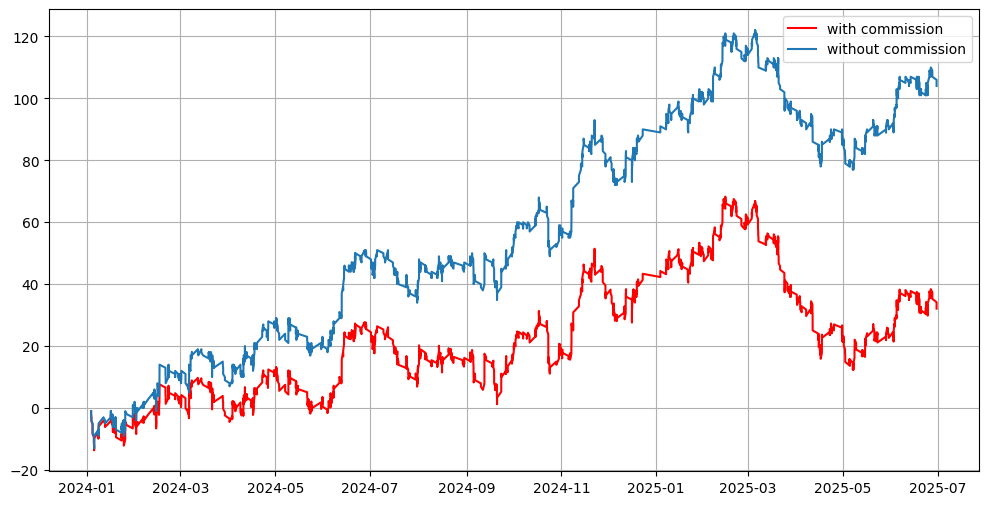

In [ ]:
# difference between commission an no commission df
final_strategy_spread["DateTime"] = pd.to_datetime(final_strategy_spread["DateTime"])
final_strategy["DateTime"] = pd.to_datetime(final_strategy["DateTime"])

final_strategy_spread["pnl_cumulato"] = final_strategy_spread["outcome"].cumsum()
final_strategy["pnl_cumulato"] = final_strategy["outcome"].cumsum()

plt.figure(figsize=(12,6))
plt.plot(final_strategy_spread["DateTime"],final_strategy_spread["pnl_cumulato"],label="with commission",color="red")
plt.plot(final_strategy["DateTime"],final_strategy["pnl_cumulato"],label="without commission")
plt.grid()
plt.legend()

In [ ]:
trades_eur.to_csv("trades_eur.csv",index=False)

In [ ]:
trades_xau.to_csv("trades_xau.csv",index=False)

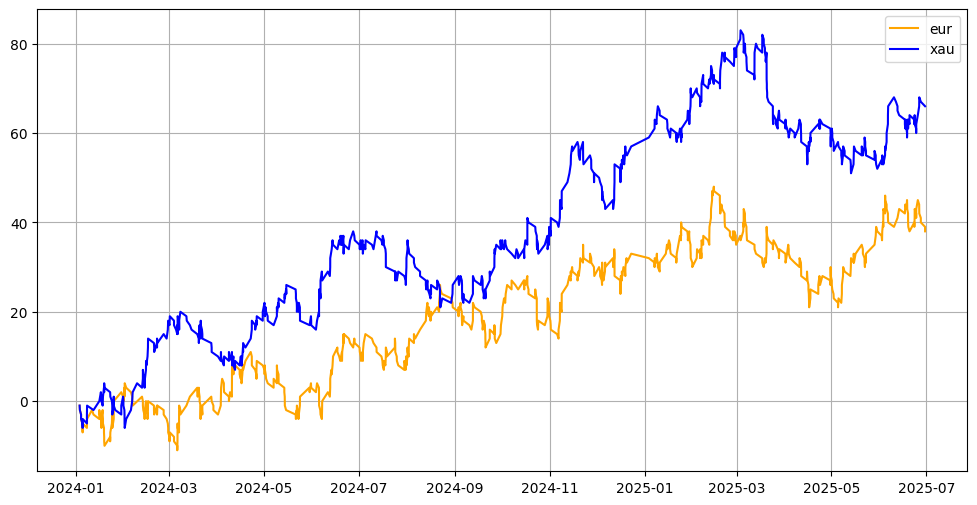

In [ ]:
#manage date time if the data frame has different start period
trades_xau["DateTime"] = pd.to_datetime(trades_xau["DateTime"])
trades_eur["DateTime"] = pd.to_datetime(trades_eur["DateTime"])

# Manual starting time
start = pd.Timestamp(trades_eur["DateTime"].iloc[0])

# Filtra by start date
trades_xau = trades_xau[trades_xau["DateTime"] >= start]

# calculated cumulative pnl
trades_eur["pnl_cumulato"] = trades_eur["outcome"].cumsum()
trades_xau["pnl_cumulato"] = trades_xau["outcome"].cumsum()

# plotting time series
plt.figure(figsize=(12,6))
plt.plot(trades_eur["DateTime"],trades_eur["pnl_cumulato"],label="eur",color="orange")
plt.plot(trades_xau["DateTime"],trades_xau["pnl_cumulato"],label="xau",color="blue")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# correlation of trade with the same date time
merged_ex = pd.merge(trades_eur, trades_xau, on="DateTime", suffixes=("_e", "_x"))
correlation_ex = merged_ex["outcome_e"].corr(merged_ex["outcome_x"])

print("Correlazione eur - xau : ", correlation_ex)


Correlazione eur - xau :  -0.014526444314996216


In [ ]:
# correlation of pnl
merged_ex["cum_pnl_e"] = merged_ex["outcome_e"].cumsum()
merged_ex["cum_pnl_x"] = merged_ex["outcome_x"].cumsum()

pnl_correlation = merged_ex["cum_pnl_e"].corr(merged_ex["cum_pnl_x"])

print("Correlazione:", pnl_correlation)

Correlazione: 0.8380368405535468


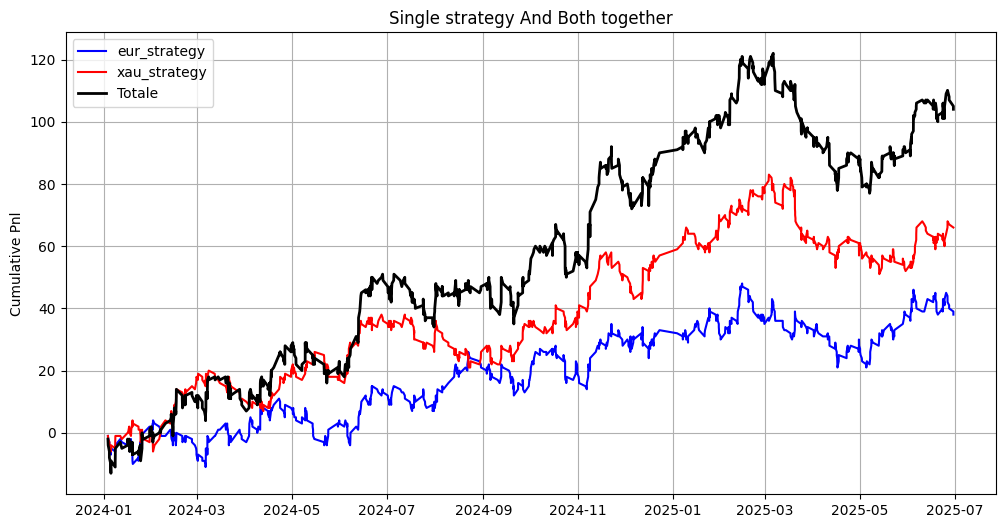

In [ ]:
# function to merge two backtest
def merge_strategies(df1, df2, nome1="A", nome2="B"):

    df1["DateTime"] = pd.to_datetime(df1["DateTime"])
    df2["DateTime"] = pd.to_datetime(df2["DateTime"])

    # consider only cumulative pnl and datetime
    df1 = df1[["DateTime", "pnl_cumulato"]].rename(columns={"pnl_cumulato": f"pnl_{nome1}"})
    df2 = df2[["DateTime", "pnl_cumulato"]].rename(columns={"pnl_cumulato": f"pnl_{nome2}"})

    # merge by datetime
    merged = pd.merge(df1, df2, on="DateTime", how="outer").sort_values("DateTime").reset_index(drop=True)

    cols = [f"pnl_{nome1}", f"pnl_{nome2}"]
    merged[cols] = merged[cols].apply(pd.to_numeric, errors='coerce')
    merged[cols] = merged[cols].ffill()

    # FIll nan with 0
    merged[[f"pnl_{nome1}", f"pnl_{nome2}"]] = merged[[f"pnl_{nome1}", f"pnl_{nome2}"]].fillna(0)

    # calculate cumulative pnl
    merged["pnl_totale"] = merged[f"pnl_{nome1}"] + merged[f"pnl_{nome2}"]

    return merged

merged = merge_strategies(trades_eur,trades_xau, nome1="eur_strategy", nome2="xau_strategy")

# chart
plt.figure(figsize=(12,6))
plt.plot(merged["DateTime"], merged["pnl_eur_strategy"], label="eur_strategy",color="blue")
plt.plot(merged["DateTime"], merged["pnl_xau_strategy"], label="xau_strategy",color="red")
plt.plot(merged["DateTime"], merged["pnl_totale"], label="Totale", linewidth=2, color="black")
plt.grid()
plt.legend()
plt.ylabel("Cumulative Pnl")
plt.title("Single strategy And Both together")

plt.show()


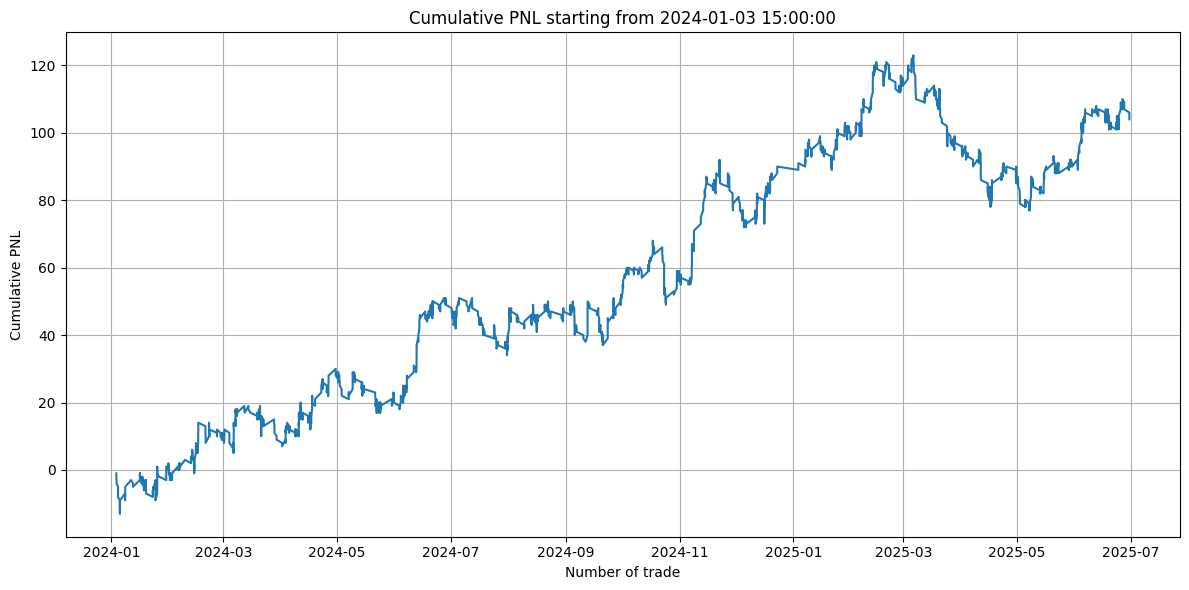


=== ANALISYS ALL TRADES ===
Pnl : 104
Numeber of Trade: 1438
Win Rate: 35.74%
Consecutive losses: 17
Max Drawdown: 46
Annual volatility: 22.37% considering a 0.50% risk per trade of capital
CAGR: 34.98% considering a 0.50% risk per trade  of capital
Sharpe ratio: 1.6
Average Reward : 2
Exepcted value: 0.072
Average number of candles after news: 3
Average number of candles after entry: 50

=== ANALISYS BY DIRECTION ===
Direction  WinRate  Cumulative_PnL
     LONG 0.391363             129
    SHORT 0.321377             -25

=== ANALISYS BY NEWS ===
                                                          Name  WinRate Cumulative_PnL  Num_Trades Expected_win
                                CAD BoC Monetary Policy Report 0.200000             -2           5        -0.40
                             CAD BoC Monetary Policy Statement 0.409091              5          22         0.23
                                      CAD BoC Press Conference 0.250000             -6          24        -0.2

In [ ]:
# obserbing performance of final strategy
results = analyze_trades(final_strategy.copy(),risk_per_trade)

In [ ]:
# Monte carlo simulation
def equity_curve_simulation(initial_capital, winrate, rr, n_trades, n_simulations, risk_per_trade):
    results = []
    all_equities = []

    # iteeration based on the number of simulations
    for _ in range(n_simulations):
        equity = initial_capital
        equity_path = [equity]
        max_equity = equity
        drawdowns = []
        current_win_streak, current_loss_streak = 0, 0
        max_consec_win, max_consec_loss = 0, 0

        for _ in range(n_trades):
            risk = equity * risk_per_trade
            if np.random.rand() < winrate:
                # win trade
                equity += risk * rr
                current_win_streak += 1
                current_loss_streak = 0
            else:
                # loss trade
                equity -= risk
                current_loss_streak += 1
                current_win_streak = 0

            max_consec_win = max(max_consec_win, current_win_streak)
            max_consec_loss = max(max_consec_loss, current_loss_streak)

            #  drawdown
            max_equity = max(max_equity, equity)
            dd = (max_equity - equity) / max_equity
            drawdowns.append(dd)

            equity_path.append(equity)

        all_equities.append(equity_path)
        results.append({
            "final_equity": equity,
            "max_drawdown": max(drawdowns),
            "max_consec_win": max_consec_win,
            "max_consec_loss": max_consec_loss
        })

    return np.array(all_equities), results


def performance_metrics(all_equities, results, initial_capital, winrate, rr):
    # Expectation per trade
    expectation = winrate * rr - (1 - winrate) * 1

    # Kelly Fraction
    kelly = (winrate * (rr + 1) - 1) / rr

    final_equities = [r["final_equity"] for r in results]
    max_dds = [r["max_drawdown"] for r in results]

    min_equity = np.min(final_equities)
    max_equity = np.max(final_equities)
    avg_performance = np.mean(final_equities) / initial_capital - 1
    avg_max_dd = np.mean(max_dds)
    biggest_max_dd = np.max(max_dds)

    return {
        "Kelly fraction": kelly,
        "Expected value": expectation,
        "Biggest max drawdown": biggest_max_dd,
        "Avg. max drawdown": avg_max_dd,
        "Min Equity": min_equity,
        "Max Equity": max_equity,
        "Avg. performance": avg_performance,
        "Max consecutive winner": np.max([r["max_consec_win"] for r in results]),
        "Max consecutive loser": np.max([r["max_consec_loss"] for r in results])
    }


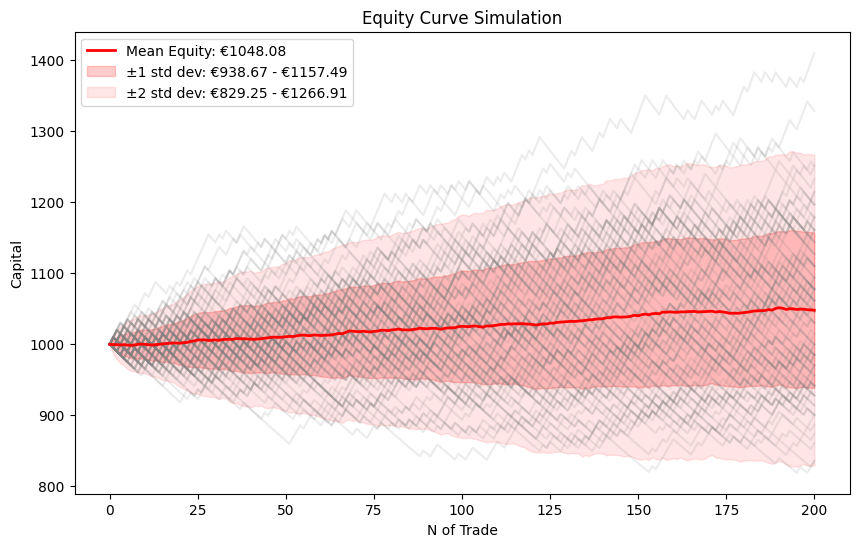


--- Performance Metrics ---
Kelly fraction: 0.025
Expected value: 0.05
Biggest max drawdown: 19.48 %
Avg. max drawdown: 9.608 %
Min Equity: €835.646
Max Equity: €1410.79
Avg. performance: 4.808 %
Max consecutive winner: 8
Max consecutive loser: 17


In [ ]:
# SImulation parameters
initial_capital = 1000
winrate = 0.35
rr = 2
n_trades = 200
n_simulations = 100
risk_per_trade = 0.005

# use simulation functions
equities, results = equity_curve_simulation(initial_capital, winrate, rr, n_trades, n_simulations, risk_per_trade)
metrics = performance_metrics(equities, results, initial_capital, winrate, rr)

# Plot with mean
mean_equity = np.mean(equities, axis=0)
std_equity = np.std(equities, axis=0)

# Last value
mean_last = mean_equity[-1]
std_last = std_equity[-1]

# Plot
plt.figure(figsize=(10,6))
for eq in equities:
    plt.plot(eq, alpha=0.15, color="gray")

plt.plot(mean_equity, color="red", linewidth=2, label=f"Mean Equity: €{mean_last:.2f}")

plt.fill_between(range(len(mean_equity)),
                 mean_equity - std_equity,
                 mean_equity + std_equity,
                 color="red", alpha=0.2,
                 label=f"±1 std dev: €{mean_last - std_last:.2f} - €{mean_last + std_last:.2f}")

plt.fill_between(range(len(mean_equity)),
                 mean_equity - 2*std_equity,
                 mean_equity + 2*std_equity,
                 color="red", alpha=0.1,
                 label=f"±2 std dev: €{mean_last - 2*std_last:.2f} - €{mean_last + 2*std_last:.2f}")

plt.title("Equity Curve Simulation")
plt.xlabel("N of Trade")
plt.ylabel("Capital")
plt.legend()
plt.show()

# print result
print("\n--- Performance Metrics ---")
for k,v in metrics.items():
    if isinstance(v, (int, np.integer)):
        print(f"{k}: {v}")
    elif "Equity" in k:
        print(f"{k}: €{np.round(v,3)}")
    elif k in ["Kelly fraction", "Expected value"]:
        print(f"{k}: {np.round(v,3)}")
    else:
        print(f"{k}: {np.round(v*100,3)} %")

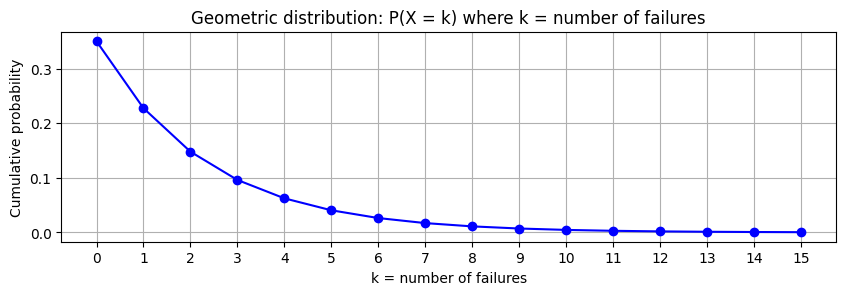

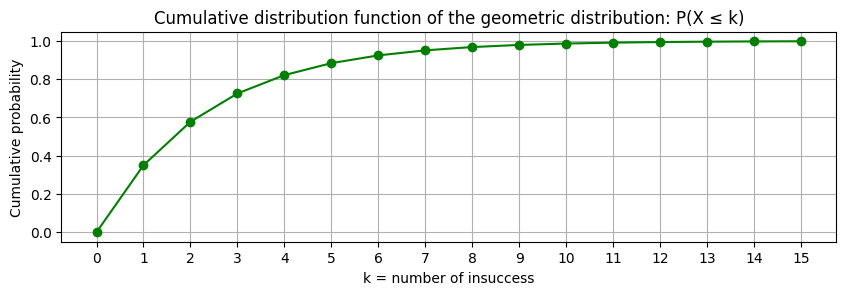

In [ ]:
# PROBABILITY DISTRIBUTION
# Parameters
n = 15
winrate = 0.35

# vector
k = np.arange(0, n+1)

# geometric distribution
pmf_geo = (1 - winrate)**(k) * winrate

# cumulative distribution
cdf_geo = 1 - (1 - winrate)**k

# PMF Chart
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(k, pmf_geo, marker='o', linestyle='-', color='blue')
plt.title("Geometric distribution: P(X = k) where k = number of failures")
plt.xlabel("k = number of failures")
plt.ylabel("Cumulative probability")
plt.xticks(k)
plt.grid(True)
plt.show()

# CDF Chart
plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
plt.plot(k, cdf_geo, marker='o', linestyle='-', color='green')
plt.title("Cumulative distribution function of the geometric distribution: P(X ≤ k)")
plt.xlabel("k = number of insuccess")
plt.ylabel("Cumulative probability")
plt.xticks(k)
plt.grid(True)
plt.show()


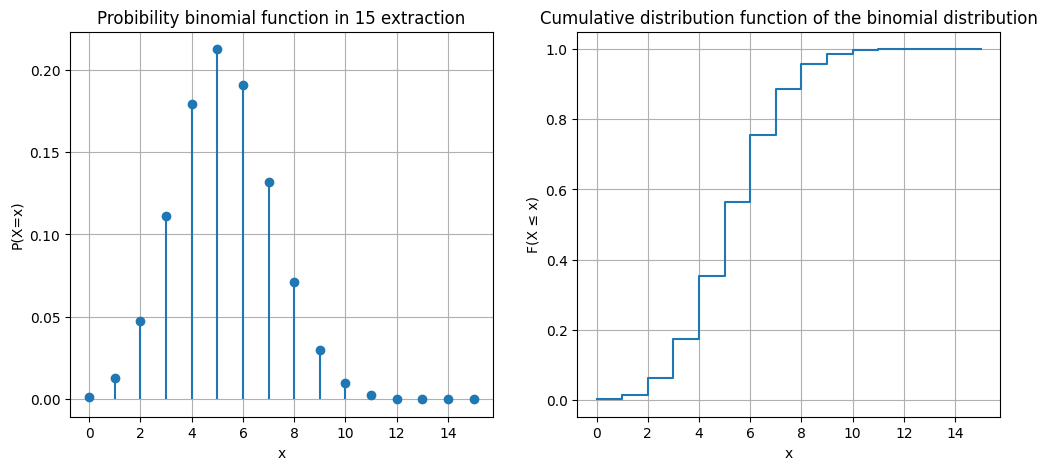

In [ ]:
# BINOMIAL DISTRIBUTION
from scipy.stats import binom
# probability function
pmf = binom.pmf(k, n, winrate)

# Cumulative distribution function
cdf = binom.cdf(k, n, winrate)

# Chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PMF
axes[0].stem(k, pmf, basefmt=" ")
axes[0].set_title("Probibility binomial function in "+str(n)+" extraction")
axes[0].set_xlabel("x")
axes[0].set_ylabel("P(X=x)")
axes[0].grid()

# CDF
axes[1].step(k, cdf, where="post")
axes[1].set_title("Funzione di ripartizione Binomiale")
axes[1].set_xlabel("x")
axes[1].set_ylabel("F(X ≤ x)")
axes[1].grid()

plt.show()

In [ ]:
# COMPARE WITH BENCHMARK

# Set starting date
start_date = "2024-01-01"

# Filter by date
final_strategy_date = final_strategy_spread[pd.to_datetime(final_strategy_spread["DateTime"]) >= pd.to_datetime(start_date)]

print(final_strategy_date.head())

             DateTime                       Name Currency direction  candle_after outcome  candles_to_outcome pnl_cumulato
0 2024-01-03 15:00:00  USD ISM Manufacturing PMI      USD     SHORT             2   -1.05                64.0        -1.05
1 2024-01-03 15:00:00  USD ISM Manufacturing PMI      USD     SHORT             2   -1.05                60.0         -2.1
2 2024-01-03 19:00:00           USD FOMC Minutes      USD      LONG             1   -1.05               169.0        -3.15
3 2024-01-03 19:00:00           USD FOMC Minutes      USD      LONG             1   -1.05               161.0         -4.2
4 2024-01-04 13:15:00  USD ADP Employment Change      USD     SHORT             1   -1.05                 7.0        -5.25


In [ ]:
# import sp500 data
import yfinance as yf
start = final_strategy_date["DateTime"].iloc[0].strftime("%Y-%m-%d")
end = final_strategy_date["DateTime"].iloc[-1].strftime("%Y-%m-%d")
ticker = "^GSPC"
interval = "1d"
sp500 = yf.download(ticker,start = start, end = end, interval= interval)["Close"]
sp500.head()

/tmp/ipython-input-3975192062.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(ticker,start = start, end = end, interval= interval)["Close"]
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2024-01-03,4704.810059
2024-01-04,4688.680176
2024-01-05,4697.240234
2024-01-08,4763.540039
2024-01-09,4756.500000


In [ ]:
# Simulation strategies with fixed risk pct and dynamic risk
def simulate_strategies(df, initial_capital, risk_pct):
    outcomes = df["outcome"].values

    # strategy A: fixed risk
    equity_A = [initial_capital]
    fixed_risk = initial_capital * risk_pct
    for o in outcomes:
        new_equity = equity_A[-1] + o * fixed_risk
        equity_A.append(new_equity)

    # strategy B: dynamic risk
    equity_B = [initial_capital]
    for o in outcomes:
        risk_amount = equity_B[-1] * risk_pct
        new_equity = equity_B[-1] + o * risk_amount
        equity_B.append(new_equity)

    result = pd.DataFrame({
        "DateTime": [None] + df["DateTime"].tolist(),
        "Equity_A_fixed": equity_A,
        "Equity_B_growth": equity_B
    })
    return result


In [ ]:
initial_capital = 1000
risk = 0.005
equity_curve = simulate_strategies(final_strategy_date, initial_capital, risk)

print(equity_curve.tail())


                DateTime  Equity_A_fixed  Equity_B_growth
1434 2025-06-27 12:30:00         1181.50      1155.465492
1435 2025-06-27 12:30:00         1176.25      1149.399298
1436 2025-06-30 06:00:00         1171.00      1143.364952
1437 2025-06-30 06:00:00         1165.75      1137.362286
1438 2025-06-30 06:00:00         1160.50      1131.391134


In [ ]:
# manage date time to look better chart
equity_curve["Date"] = pd.to_datetime(equity_curve["DateTime"]).dt.date
# Group by the last price of date
strategy_A = equity_curve.groupby("Date")["Equity_A_fixed"].last()
strategy_B = equity_curve.groupby("Date")["Equity_B_growth"].last()

# use the same index as sp500
sp500.index = sp500.index.date
comparison = pd.DataFrame({
    "Strategy_fixed": strategy_A,
    "Strategy_growth": strategy_B
})

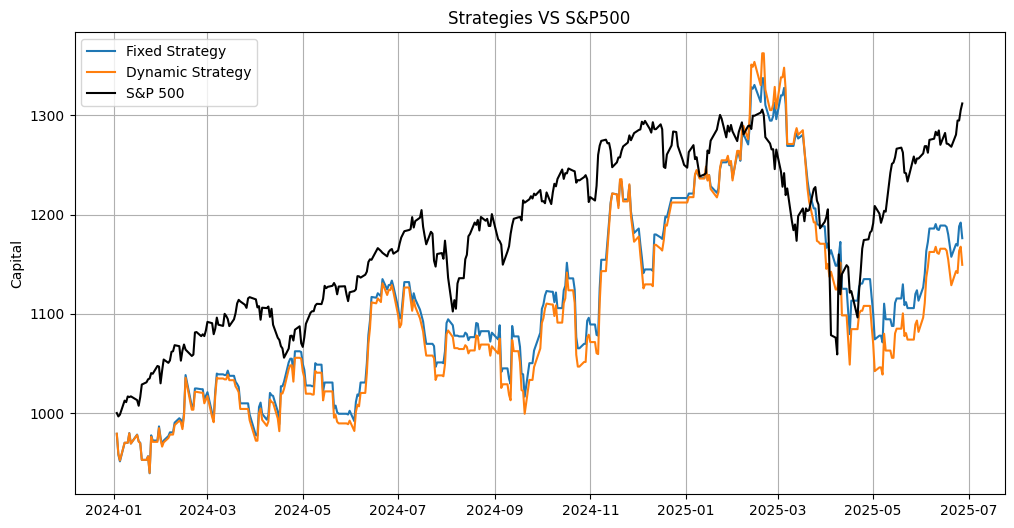

In [ ]:
comparison = comparison.reindex(sp500.index, method='ffill')

# Start from the same capitl
sp500_norm = sp500 / sp500.iloc[0] * initial_capital
comparison["SP500"] = sp500_norm.values

# Plotting results
plt.figure(figsize=(12,6))
plt.plot(comparison.index, comparison["Strategy_fixed"], label="Fixed Strategy")
plt.plot(comparison.index, comparison["Strategy_growth"], label="Dynamic Strategy")
plt.plot(comparison.index, comparison["SP500"], label="S&P 500", linestyle="-", color="black")
plt.title("Strategies VS S&P500")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# METRICS COMAPRATION
capital_curves = comparison[["Strategy_fixed", "Strategy_growth", "SP500"]]

# log returns
daily_returns = np.log(capital_curves / capital_curves.shift(1)).dropna()

# annual volatility
vol_annual = daily_returns.std() * np.sqrt(252)

# CAGR
years = (capital_curves.index[-1] - capital_curves.index[0]).days / 365
cagr = (capital_curves.iloc[-1] / capital_curves.iloc[0]) ** (1 / years) - 1

# print result
result = pd.DataFrame({
    "CAGR": cagr,
    "Volatility": vol_annual
})

print(result,"\n")

# monthly returns comparation
comparison.index = pd.to_datetime(comparison.index)

monthly_returns = comparison.resample('ME').apply(lambda x: x.iloc[-1] / x.iloc[0] - 1)

print("Monthly returns")
print(monthly_returns.round(3).to_string())

                     CAGR  Volatility
Strategy_fixed   0.131835    0.202236
Strategy_growth  0.114212    0.222381
SP500            0.201114    0.173701 

Monthly returns
            Strategy_fixed  Strategy_growth  SP500
2024-01-31          -0.004           -0.006  0.030
2024-02-29           0.051            0.049  0.039
2024-03-31          -0.022           -0.024  0.023
2024-04-30           0.086            0.085 -0.040
2024-05-31          -0.045           -0.048  0.052
2024-06-30           0.137            0.143  0.034
2024-07-31          -0.040           -0.045  0.009
2024-08-31          -0.009           -0.011  0.037
2024-09-30           0.006            0.005  0.042
2024-10-31          -0.008           -0.011 -0.001
2024-11-30           0.085            0.094  0.053
2024-12-31           0.026            0.029 -0.027
2025-01-31           0.017            0.018  0.029
2025-02-28           0.028            0.034 -0.007
2025-03-31          -0.100           -0.125 -0.041
2025-04-30    

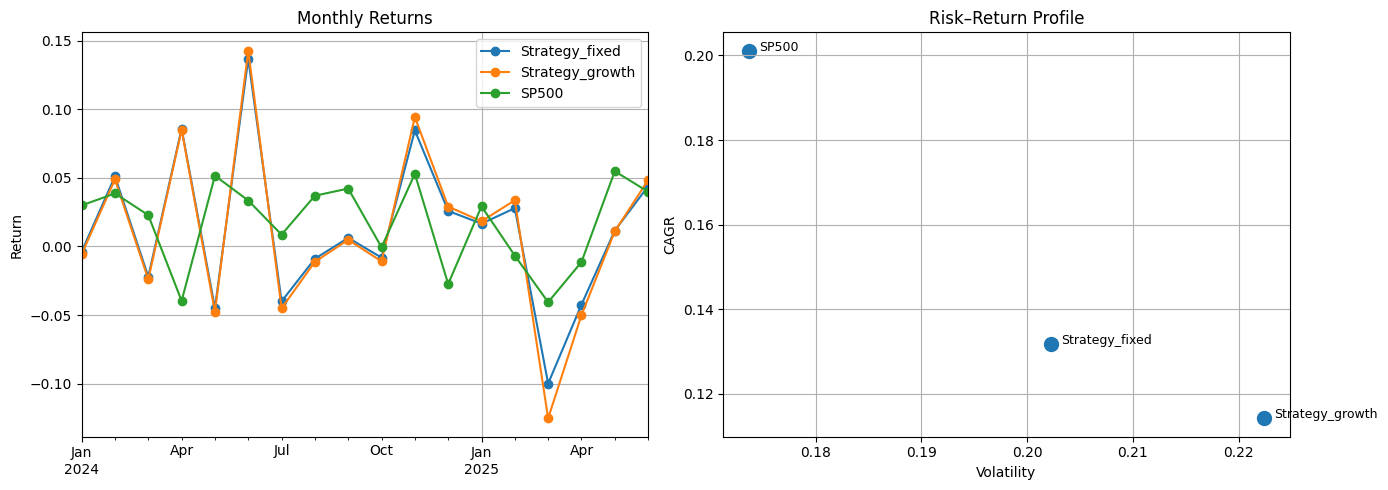

In [ ]:
# Monthly returns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

monthly_returns.plot(ax=axes[0], marker='o')
axes[0].set_title("Monthly Returns")
axes[0].set_ylabel("Return")
axes[0].grid(True)

# scatter volatility - returns
axes[1].scatter(result["Volatility"], result["CAGR"], s=100)
for i in result.index:
    axes[1].text(result.loc[i, "Volatility"] + 0.001,
                 result.loc[i, "CAGR"],
                 i, fontsize=9)

axes[1].set_xlabel("Volatility")
axes[1].set_ylabel("CAGR")
axes[1].set_title("Risk–Return Profile")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# correlation owith benchmark
pnl_corre_bench = comparison["Strategy_fixed"].corr(comparison["SP500"])
ret_corre_bench = monthly_returns["Strategy_fixed"].corr(monthly_returns["SP500"])
print("Pnl Correlation:", pnl_corre_bench)
print("Ret Correlation:", ret_corre_bench)

Pnl Correlation: 0.7961925057981415
Ret Correlation: 0.23287785648686843


100% SP500 Portfolio
  Strategy_fixed weight: 0.000
  SP500 weight: 1.000
  Return: 0.201
  Volatility: 0.174
  Sharpe ratio: 1.043

100% Strategy_fixed Portfolio
  Strategy_fixed weight: 1.000
  SP500 weight: 0.000
  Return: 0.132
  Volatility: 0.202
  Sharpe ratio: 0.553

 Maximum Sharpe Ratio Portfolio
  Strategy_fixed weight: 0.241
  SP500 weight: 0.759
  Return: 0.184
  Volatility: 0.149
  Sharpe ratio: 1.100

 Minimum Volatility Portfolio
  Strategy_fixed weight: 0.406
  SP500 weight: 0.594
  Return: 0.173
  Volatility: 0.144
  Sharpe ratio: 1.061


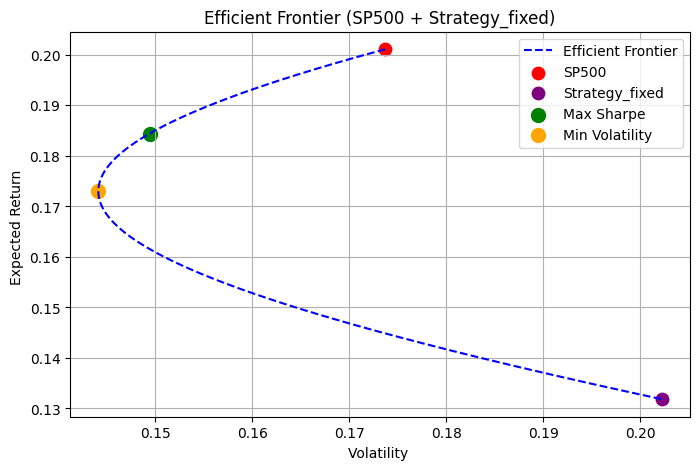

In [ ]:
# EFFICIENT FRONTIER
assets = ["Strategy_fixed", "SP500"]
returns = result.loc[assets, "CAGR"].values
vols = result.loc[assets, "Volatility"].values

# Simulate model
corr = 0.2
cov_matrix = np.array([
    [vols[0]**2, corr*vols[0]*vols[1]],
    [corr*vols[0]*vols[1], vols[1]**2]
])

rf = 0.02

weights = np.linspace(0, 1, 1001)
port_returns = []
port_vols = []
port_sharpe = []

for w in weights:
    w_vec = np.array([w, 1 - w])
    port_return = np.dot(w_vec, returns)
    port_vol = np.sqrt(np.dot(w_vec.T, np.dot(cov_matrix, w_vec)))
    sharpe = (port_return - rf) / port_vol

    port_returns.append(port_return)
    port_vols.append(port_vol)
    port_sharpe.append(sharpe)

port_returns = np.array(port_returns)
port_vols = np.array(port_vols)
port_sharpe = np.array(port_sharpe)

# Optimal points
idx_max_sharpe = np.argmax(port_sharpe)
idx_min_vol = np.argmin(port_vols)

w_max_sharpe = weights[idx_max_sharpe]
w_min_vol = weights[idx_min_vol]

# 100% SP500
w_sp500 = np.array([0, 1])
ret_sp500 = np.dot(w_sp500, returns)
vol_sp500 = np.sqrt(np.dot(w_sp500.T, np.dot(cov_matrix, w_sp500)))
sharpe_sp500 = (ret_sp500 - rf) / vol_sp500

# 100% Strategy_fixed
w_fixed = np.array([1, 0])
ret_fixed = np.dot(w_fixed, returns)
vol_fixed = np.sqrt(np.dot(w_fixed.T, np.dot(cov_matrix, w_fixed)))
sharpe_fixed = (ret_fixed - rf) / vol_fixed

# results
print("100% SP500 Portfolio")
print(f"  Strategy_fixed weight: {w_sp500[0]:.3f}")
print(f"  SP500 weight: {w_sp500[1]:.3f}")
print(f"  Return: {ret_sp500:.3f}")
print(f"  Volatility: {vol_sp500:.3f}")
print(f"  Sharpe ratio: {sharpe_sp500:.3f}\n")

print("100% Strategy_fixed Portfolio")
print(f"  Strategy_fixed weight: {w_fixed[0]:.3f}")
print(f"  SP500 weight: {w_fixed[1]:.3f}")
print(f"  Return: {ret_fixed:.3f}")
print(f"  Volatility: {vol_fixed:.3f}")
print(f"  Sharpe ratio: {sharpe_fixed:.3f}\n")

print(" Maximum Sharpe Ratio Portfolio")
print(f"  Strategy_fixed weight: {w_max_sharpe:.3f}")
print(f"  SP500 weight: {1 - w_max_sharpe:.3f}")
print(f"  Return: {port_returns[idx_max_sharpe]:.3f}")
print(f"  Volatility: {port_vols[idx_max_sharpe]:.3f}")
print(f"  Sharpe ratio: {port_sharpe[idx_max_sharpe]:.3f}\n")

print(" Minimum Volatility Portfolio")
print(f"  Strategy_fixed weight: {w_min_vol:.3f}")
print(f"  SP500 weight: {1 - w_min_vol:.3f}")
print(f"  Return: {port_returns[idx_min_vol]:.3f}")
print(f"  Volatility: {port_vols[idx_min_vol]:.3f}")
print(f"  Sharpe ratio: {port_sharpe[idx_min_vol]:.3f}")

# scatter plot
plt.figure(figsize=(8,5))
plt.plot(port_vols, port_returns, 'b--', label='Efficient Frontier')
plt.scatter(df.loc["SP500", "Volatility"], df.loc["SP500", "CAGR"], color='red', s=80, label='SP500')
plt.scatter(df.loc["Strategy_fixed", "Volatility"], df.loc["Strategy_fixed", "CAGR"], color='purple', s=80, label='Strategy_fixed')
plt.scatter(port_vols[idx_max_sharpe], port_returns[idx_max_sharpe],c='green', s=100, label='Max Sharpe')
plt.scatter(port_vols[idx_min_vol], port_returns[idx_min_vol],c='orange', s=100, label='Min Volatility')

plt.title("Efficient Frontier (SP500 + Strategy_fixed)")
plt.xlabel("Volatility ")
plt.ylabel("Expected Return ")
plt.legend()
plt.grid(True)
plt.show()
